# Sınıflandırma

Sınıflandırma problemi, regresyondan farklı olarak bağımlı değişkenin kategorik veri olduğu durumlarda kullanılır. 

Klasik regresyon modeli aşağıdaki problemleri çözer.

![Deneyim vs Ucret](Goruntuler/deneyim_ucret.png)

Sınıflandırma problemi ise aşağıdaki problemi çözer.

![Deneyim vs Ucret 1](Goruntuler/deneyim_ucret_1.png)

İlk olarak Lojistik Regresyonu inceleyelim.

## Lojistik Regresyon

Lojistik regresyon bağımsız değişkenleri sürekli, bağımlı değişkeni ise nominal (sınıflandırıcı) değişken olan regresyon türüdür. Bu işlem aşağıdaki adımlarla yapılır.

### Adım 1

Lojistik regresyon için incelenen değişken ve bu değişkene etkisi olan değişkenler elde edilir.

Örneğin Wisconsin kanser verisi, Wisconsin üniversitesinde tedavi görmüş göğüs kanseri hastalarından alınan kitlelerin yarıçap, düzgünlük gibi ölçülen bilgilerini içerir.

In [ ]:
# Kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Veri yükle
verikumesi = pd.read_csv("wdbc_1.csv")

verikumesi.plot.scatter(x="Yaricap", y="Durum", ylim=(-0.5,1.5), xlim=(6.5,28.5), c=['red'])

### Adım 2

Her bir değişken için çok küçük değerli bir katsayı verilir ve regresyon modeli hesaplanır.

\begin{array}
\\
\beta_0 &= 0.001 \\
\beta_1 &= 0.001 \\
logit(x) &= \beta_0 + \beta_1 x
\end{array}

### Adım 3

Her bir gözlem değeri için olasılık fonksiyonu sigmoid fonksiyon olarak hesaplanır.

\begin{equation}
P(X=1) = \frac{e^{logit(x)}}{1+e^{logit(x)}}
\end{equation}

### Adım 4

Her bir olasılık değeri kullanılarak Log-Benzerlik değeri hesaplanır.

\begin{equation}
LB(X) = \left\{
        \begin{array}{ll}
            ln(P(x=1)) & \quad x = 1 \\
            ln(P(x=0)) & \quad x = 0
        \end{array}
    \right.
\end{equation}

### Adım 5

Log benzerlik değerlerinin toplamını en büyük hale getiren $\beta_0$ ve $\beta_1$, optimizasyon yaklaşımları ile hesaplanır.

\begin{equation}
J = \sum_{i=0}^n LB(X_i), \forall i \in \{0,n\}
\end{equation}

Excel ile uygulayalım!

## Python ile Uygulama

In [1]:
# Kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Veri yükle
verikumesi = pd.read_csv("wdbc_multi.csv")

verikumesi

,Durum,Yaricap,Doku,Cevre,Alan,Yumusaklik,Kompaktlik,Konkavlik,KonkavNoktalar,Simetri,Fraktal
0,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871
1,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667
2,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999
3,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744
4,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883
5,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613
6,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742
7,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451
8,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389
9,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243


In [2]:
# Bağımlı ve Bağımsız değişkenleri Ayıralım

X = verikumesi.iloc[:, 1:].values
y = verikumesi.iloc[:, 0].values

In [ ]:
X

In [3]:
# Egitim ve test kümelerine ayırma
from sklearn.model_selection import train_test_split

X_ogrenme, X_test, y_ogrenme, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
# Veri Ölçekleme
from sklearn.preprocessing import StandardScaler
olcekleyici_X = StandardScaler()
X_ogrenme = olcekleyici_X.fit_transform(X_ogrenme)
X_test = olcekleyici_X.transform(X_test)

In [5]:
# Sınıflandırıcı Eğitimi
from sklearn.linear_model import LogisticRegression
siniflandirici = LogisticRegression(solver='lbfgs')
siniflandirici.fit(X_ogrenme, y_ogrenme)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
# Tahminleme

y_tahmin = siniflandirici.predict(X_test)

In [7]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [8]:
y_tahmin

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [9]:
# Karmaşıklık Matrisi (Confusion Matrix) Hesapla

from sklearn.metrics import confusion_matrix
km = confusion_matrix(y_test, y_tahmin)

km

array([[64,  3],
       [ 3, 44]], dtype=int64)

In [10]:
np.sum(y_test)

47

In [11]:
(64+44)/(64+44+3+3)

0.9473684210526315

## Sınıflandırma Şablonu

Python ile sınıflandırma işlemleri gerçekleştirebilmek için aşağıdaki şablon kullanılabilir.

Normalize edilmemiş karışıklık matrisi
[[69  8]
 [ 1 36]]
Normalize edilmiş karışıklık matrisi
[[0.8961039  0.1038961 ]
 [0.02702703 0.97297297]]


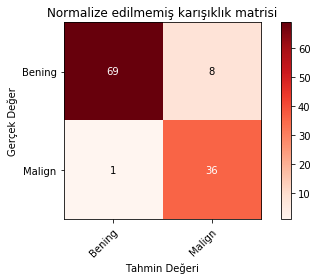

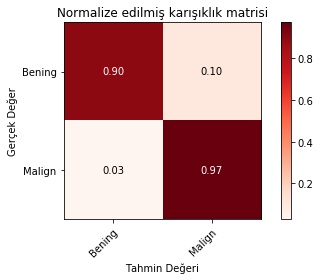

              precision    recall  f1-score   support

      Bening       0.99      0.90      0.94        77
      Malign       0.82      0.97      0.89        37

   micro avg       0.92      0.92      0.92       114
   macro avg       0.90      0.93      0.91       114
weighted avg       0.93      0.92      0.92       114



In [2]:
# Kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Veri yükle
verikumesi = pd.read_csv("wdbc_multi.csv")

# Bağımlı ve Bağımsız değişkenleri Ayıralım
X = verikumesi.iloc[:, 1:].values
y = verikumesi.iloc[:, 0].values

# Egitim ve test kümelerine ayırma
from sklearn.model_selection import train_test_split

X_ogrenme, X_test, y_ogrenme, y_test = train_test_split(X, y, test_size = 0.2)

# Veri Ölçekleme
from sklearn.preprocessing import StandardScaler
olcekleyici_X = StandardScaler()
X_ogrenme = olcekleyici_X.fit_transform(X_ogrenme)
X_test = olcekleyici_X.transform(X_test)

# Sınıflandırıcı Eğitimi
from sklearn.linear_model import LogisticRegression
siniflandirici = LogisticRegression(solver='lbfgs')
siniflandirici.fit(X_ogrenme, y_ogrenme)

# Tahminleme
y_tahmin = siniflandirici.predict(X_test)

# Karmaşıklık Matrisi (Confusion Matrix) Hesapla
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Karmaşıklık Matrisinin Grafiksel Gösterimi
def karmasiklik_matrisi_ciz(y_test, y_tahmin, siniflar,
                          normalize=False,
                          baslik=None,
                          renkHaritasi=plt.cm.Reds):
    """
    Bu fonksiyon karmaşıklık matrisini yazdırır ve çizer.
    Normalizasyon normalize parametresi True yapılarak elde edilebilir.
    """
    if not baslik:
        if normalize:
            title = 'Normalize edilmiş karışıklık matrisi'
        else:
            title = 'Normalize edilmemiş karışıklık matrisi'

    # Karışıklık Matrisini Hesapla
    cm = confusion_matrix(y_test, y_tahmin)
    # Sadece veride bulunan sınıfları göster
    siniflar = siniflar[unique_labels(y_test, y_tahmin)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalize edilmiş karışıklık matrisi")
    else:
        print('Normalize edilmemiş karışıklık matrisi')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=renkHaritasi)
    ax.figure.colorbar(im, ax=ax)
    
    # Tüm işaretleri ...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... ve etiketlerini görmek istiyoruz
           xticklabels=siniflar, yticklabels=siniflar,
           title=title,
           ylabel='Gerçek Değer',
           xlabel='Tahmin Değeri')

    # İşaretlerin etiketlerini döndür ve hizalamalarını ayarla.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Veri boyutları için döngü kur ve metin açıklamalarını oluştur.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

karmasiklik_matrisi_ciz(y_test, y_tahmin, np.array(['Bening', 'Malign']))
karmasiklik_matrisi_ciz(y_test, y_tahmin, np.array(['Bening', 'Malign']), normalize=True)

plt.show()

# Sınıflandırma Raporu
from sklearn.metrics import classification_report
print(classification_report(y_test, y_tahmin, target_names=['Bening', 'Malign']))

## K-En Yakın Komşu Sınıflandırma

K-En Yakın Komşu algoritması veri noktalarını en yakın komşularına göre sınıflandırmayı amaçlayan bir yaklaşımdır.

![KNN1](Goruntuler/Knn1.png)

Burada Knn Algoritması en yakın k komşunun durumuna göre yeni noktanın sınıfını belirler. K Genellikle tek sayı seçilir. Uzaklık temelli bir algoritma olduğu için verilerin ölçeklendirilmesi önem taşımaktadır. Kullanılan uzaklık ölçüsüne göre farklı sonuçlar elde edilebilmektedir.

Yaklaşımın adımları aşağıdaki gibidir.

1. K Seçilir.
2. Yeni noktaya göre (bilinmeyen) k en yakın komşu belirlenir.
3. Bu noktaların sınıfları sayılır.
4. Yeni nokta en fazla sayıda olan sınıfa atanır.

C:\ProgramKurulumu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramKurulumu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramKurulumu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Normalize edilmemiş karışıklık matrisi
[[64  4]
 [ 3 29]]
Normalize edilmiş karışıklık matrisi
[[0.94117647 0.05882353]
 [0.09375    0.90625   ]]


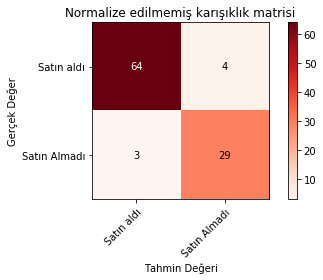

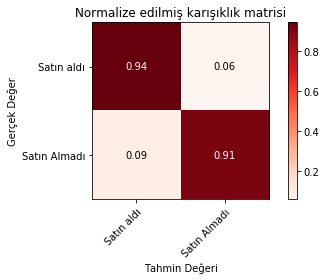

In [4]:
# Kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Veri yükle
verikumesi = pd.read_csv("SosyalMedyaReklam.csv", delimiter=';')

# Bağımlı ve Bağımsız değişkenleri Ayıralım
X = verikumesi.iloc[:, 1:].values
y = verikumesi.iloc[:, 0].values

# Egitim ve test kümelerine ayırma
from sklearn.model_selection import train_test_split
X_ogrenme, X_test, y_ogrenme, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Veri Ölçekleme
from sklearn.preprocessing import StandardScaler
olcekleyici_X = StandardScaler()
X_ogrenme = olcekleyici_X.fit_transform(X_ogrenme)
X_test = olcekleyici_X.transform(X_test)

# Sınıflandırıcı Eğitimi
from sklearn.neighbors import KNeighborsClassifier
siniflandirici = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=1)
siniflandirici.fit(X_ogrenme, y_ogrenme)

# Tahminleme
y_tahmin = siniflandirici.predict(X_test)

# Karmaşıklık Matrisi (Confusion Matrix) Hesapla
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Karmaşıklık Matrisinin Grafiksel Gösterimi
def karmasiklik_matrisi_ciz(y_test, y_tahmin, siniflar,
                          normalize=False,
                          baslik=None,
                          renkHaritasi=plt.cm.Reds):
    """
    Bu fonksiyon karmaşıklık matrisini yazdırır ve çizer.
    Normalizasyon normalize parametresi True yapılarak elde edilebilir.
    """
    if not baslik:
        if normalize:
            title = 'Normalize edilmiş karışıklık matrisi'
        else:
            title = 'Normalize edilmemiş karışıklık matrisi'

    # Karışıklık Matrisini Hesapla
    cm = confusion_matrix(y_test, y_tahmin)
    # Sadece veride bulunan sınıfları göster
    siniflar = siniflar[unique_labels(y_test, y_tahmin)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalize edilmiş karışıklık matrisi")
    else:
        print('Normalize edilmemiş karışıklık matrisi')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=renkHaritasi)
    ax.figure.colorbar(im, ax=ax)
    
    # Tüm işaretleri ...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... ve etiketlerini görmek istiyoruz
           xticklabels=siniflar, yticklabels=siniflar,
           title=title,
           ylabel='Gerçek Değer',
           xlabel='Tahmin Değeri')

    # İşaretlerin etiketlerini döndür ve hizalamalarını ayarla.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Veri boyutları için döngü kur ve metin açıklamalarını oluştur.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

karmasiklik_matrisi_ciz(y_test, y_tahmin, np.array(['Satın aldı', 'Satın Almadı']))
karmasiklik_matrisi_ciz(y_test, y_tahmin, np.array(['Satın aldı', 'Satın Almadı']), normalize=True)

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


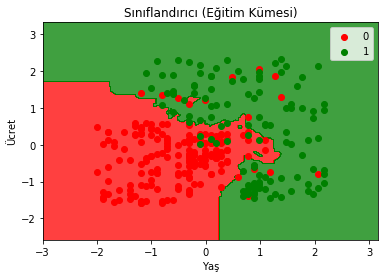

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


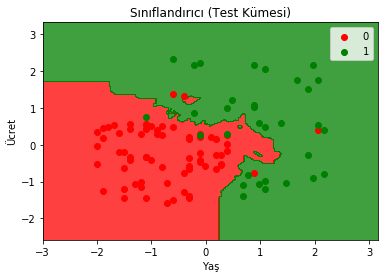

In [5]:
# Egitim Sonuclarinin İki Boyutlu Gösterimi
from matplotlib.colors import ListedColormap
X_set, y_set = X_ogrenme, y_ogrenme
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, siniflandirici.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Sınıflandırıcı (Eğitim Kümesi)')
plt.xlabel('Yaş')
plt.ylabel('Ücret')
plt.legend()
plt.show()

# Test Sonuclarinin İki Boyutlu Gösterimi
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, siniflandirici.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Sınıflandırıcı (Test Kümesi)')
plt.xlabel('Yaş')
plt.ylabel('Ücret')
plt.legend()
plt.show()

Normalize edilmemiş karışıklık matrisi
[[83  7]
 [ 4 49]]
Normalize edilmiş karışıklık matrisi
[[0.92222222 0.07777778]
 [0.0754717  0.9245283 ]]


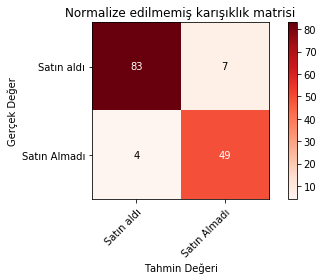

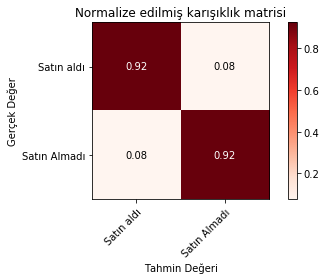

In [3]:
# Kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Veri yükle
verikumesi = pd.read_csv("wdbc_multi.csv")

# Bağımlı ve Bağımsız değişkenleri Ayıralım
X = verikumesi.iloc[:, 1:].values
y = verikumesi.iloc[:, 0].values

# Egitim ve test kümelerine ayırma
from sklearn.model_selection import train_test_split
X_ogrenme, X_test, y_ogrenme, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Veri Ölçekleme
from sklearn.preprocessing import StandardScaler
olcekleyici_X = StandardScaler()
X_ogrenme = olcekleyici_X.fit_transform(X_ogrenme)
X_test = olcekleyici_X.transform(X_test)

# Sınıflandırıcı Eğitimi
from sklearn.neighbors import KNeighborsClassifier
siniflandirici = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=1)
siniflandirici.fit(X_ogrenme, y_ogrenme)

# Tahminleme
y_tahmin = siniflandirici.predict(X_test)

# Karmaşıklık Matrisi (Confusion Matrix) Hesapla
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Karmaşıklık Matrisinin Grafiksel Gösterimi
def karmasiklik_matrisi_ciz(y_test, y_tahmin, siniflar,
                          normalize=False,
                          baslik=None,
                          renkHaritasi=plt.cm.Reds):
    """
    Bu fonksiyon karmaşıklık matrisini yazdırır ve çizer.
    Normalizasyon normalize parametresi True yapılarak elde edilebilir.
    """
    if not baslik:
        if normalize:
            title = 'Normalize edilmiş karışıklık matrisi'
        else:
            title = 'Normalize edilmemiş karışıklık matrisi'

    # Karışıklık Matrisini Hesapla
    cm = confusion_matrix(y_test, y_tahmin)
    # Sadece veride bulunan sınıfları göster
    siniflar = siniflar[unique_labels(y_test, y_tahmin)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalize edilmiş karışıklık matrisi")
    else:
        print('Normalize edilmemiş karışıklık matrisi')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=renkHaritasi)
    ax.figure.colorbar(im, ax=ax)
    
    # Tüm işaretleri ...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... ve etiketlerini görmek istiyoruz
           xticklabels=siniflar, yticklabels=siniflar,
           title=title,
           ylabel='Gerçek Değer',
           xlabel='Tahmin Değeri')

    # İşaretlerin etiketlerini döndür ve hizalamalarını ayarla.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Veri boyutları için döngü kur ve metin açıklamalarını oluştur.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

karmasiklik_matrisi_ciz(y_test, y_tahmin, np.array(['Satın aldı', 'Satın Almadı']))
karmasiklik_matrisi_ciz(y_test, y_tahmin, np.array(['Satın aldı', 'Satın Almadı']), normalize=True)

plt.show()